In [ ]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

# Parte 1 - Leitura dos datasets e prepação dos dataframes para a análise dos dados

## Leitura dos datasets

In [ ]:
df_mat = pd.read_csv('student-mat.csv', sep = ';');
df_mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [ ]:
df_por = pd.read_csv('student-por.csv', sep = ';');
df_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [ ]:
df = pd.merge(df_mat, df_por, how = 'inner', on = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']);
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_x,traveltime_x,studytime_x,failures_x,schoolsup_x,famsup_x,paid_x,activities_x,nursery,higher_x,internet,romantic_x,famrel_x,freetime_x,goout_x,Dalc_x,Walc_x,health_x,absences_x,G1_x,G2_x,G3_x,guardian_y,traveltime_y,studytime_y,failures_y,schoolsup_y,famsup_y,paid_y,activities_y,higher_y,romantic_y,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,mother,2,2,0,yes,no,no,no,yes,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,father,1,2,0,no,yes,no,no,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,mother,1,2,0,yes,no,no,no,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,mother,1,3,0,no,yes,no,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,father,1,2,0,no,yes,no,no,yes,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,3,4,1,1,1,0,7,9,8,mother,1,2,0,no,yes,no,no,yes,no,4,3,4,1,1,1,4,15,15,16
378,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0,mother,3,2,2,no,no,no,yes,yes,yes,3,4,4,2,2,5,3,7,8,7
379,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0,mother,2,2,0,no,no,no,yes,yes,no,1,1,1,1,1,5,6,11,12,9
380,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,mother,2,1,0,no,no,no,no,yes,no,2,4,5,3,4,2,6,10,10,10


In [ ]:
df.rename(columns={
    'guardian_x': 'guardian_mat',
    'traveltime_x': 'traveltime_mat',
    'studytime_x': 'studytime_mat',
    'failures_x': 'failures_mat',
    'shcoolsup_x': 'schoolsup_mat',
    'famsup_x': 'famsup_mat',
    'paid_x': 'paid_mat',
    'activities_x': 'activities_mat',
    'higher_x': 'higher_mat',
    'romantic_x': 'romantic_mat',
    'famrel_x': 'famrel_mat',
    'freetime_x': 'freetime_mat',
    'goout_x': 'goout_mat',
    'Dalc_x': 'Dalc_mat',
    'Walc_x': 'Walc_mat',
    'health_x': 'health_mat',
    'absences_x': 'absences_mat',
    'G1_x': 'G1_mat',
    'G2_x': 'G2_mat',
    'G3_x': 'G3_mat',
    'guardian_y': 'guardian_por',
    'traveltime_y': 'traveltime_por',
    'studytime_y': 'studytime_por',
    'failures_y': 'failures_por',
    'shcoolsup_y': 'schoolsup_por',
    'famsup_y': 'famsup_por',
    'paid_y': 'paid_por',
    'activities_y': 'activities_por',
    'higher_y': 'higher_por',
    'romantic_y': 'romantic_por',
    'famrel_y': 'famrel_por',
    'freetime_y': 'freetime_por',
    'goout_y': 'goout_por',
    'Dalc_y': 'Dalc_por',
    'Walc_y': 'Walc_por',
    'health_y': 'health_por',
    'absences_y': 'absences_por',
    'G1_y': 'G1_por',
    'G2_y': 'G2_por',
    'G3_y': 'G3_por'
}, inplace = True);
df.head();

## Definição da média final

In [ ]:
df['GF'] = (df['G1_mat'] + df['G2_mat'] + df['G3_mat'] + df['G1_por'] + df['G2_por'] + df['G3_por'])/6;
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_mat,traveltime_mat,studytime_mat,failures_mat,schoolsup_x,famsup_mat,paid_mat,activities_mat,nursery,higher_mat,internet,romantic_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat,guardian_por,traveltime_por,studytime_por,failures_por,schoolsup_y,famsup_por,paid_por,activities_por,higher_por,romantic_por,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por,GF
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,mother,2,2,0,yes,no,no,no,yes,no,4,3,4,1,1,3,4,0,11,11,6.500000
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,father,1,2,0,no,yes,no,no,yes,no,5,3,3,1,1,3,2,9,11,11,7.833333
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,mother,1,2,0,yes,no,no,no,yes,no,4,3,2,2,3,3,6,12,13,12,10.333333
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,mother,1,3,0,no,yes,no,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,14.333333
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,father,1,2,0,no,yes,no,no,yes,no,4,3,2,1,2,5,0,11,13,13,10.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,3,4,1,1,1,0,7,9,8,mother,1,2,0,no,yes,no,no,yes,no,4,3,4,1,1,1,4,15,15,16,11.666667
378,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0,mother,3,2,2,no,no,no,yes,yes,yes,3,4,4,2,2,5,3,7,8,7,5.500000
379,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0,mother,2,2,0,no,no,no,yes,yes,no,1,1,1,1,1,5,6,11,12,9,7.166667
380,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,mother,2,1,0,no,no,no,no,yes,no,2,4,5,3,4,2,6,10,10,10,12.666667


# Parte 2 - Obtenção de informações gerais a respeito das médias finais

## Resumo dos dados

O método describe() da biblioteca Pandas nos permite ter um resumo estatísticos dos d1ados de uma forma rápida, facilitando a análise dos dados e economizando tempo. Abaixo aplicamos esse método ao dataframe em análise:

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime_mat,studytime_mat,failures_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat,traveltime_por,studytime_por,failures_por,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por,GF
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,1.473822,2.280105,3.578534,5.319372,10.861257,10.712042,10.387435,1.445026,2.039267,0.141361,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707,11.471204
std,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,0.886229,1.282866,1.400360,7.625251,3.349167,3.832560,4.687242,0.699354,0.845571,0.513253,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438,2.818131
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000,4.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.250000,8.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000,9.500000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,3.000000,10.500000,11.000000,11.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000,11.333333
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,18.333333


Embora esse método tenha retornado medidas que não fazem sentido para as variáveis qualitativas, podemos ignorá-las e considerar apenas as variáveis quantitavias em nossa análise 

Podemos extrair diversos dados do resumo estatístico, dentre eles (arrendodados para duas casas decimais): <br><br>
- A média das  idades dos alunos é 16.59
- O aluno mais novo tem 15 anos
- O aluno mais velho tem 22 anos
- O tempo médio que os alunos gastam estudando Português é em tornod e 2 a 5 horas (porque a média é 2.039267 - entre 2 e 3)

Dados que são interessantes para análise e que podemos extrair do resumo dizem respeito às médias finais dos alunos. Observando esses dados (arrendondados para duas casas decimais), temos: <br><br>
- A média das médias é 11.47
- A mediana das médias (segundo quartil) é 11.33
- O terceiro quartil das médias é 13.33
- A menor média é 4
- A maior média é 18.33

O fato da mediana (segundo quartil) ser 11.3, indica que pelo menos 50% dos alunos obteve média acima de 11.3 e que 50% dos alunos obteve média acima de 11.3. <br><br>
O fato do terceiro quartil ser 13.33 indica que pelo menos 75% dos alunos obteve nota acima de 13.33, ao passo que pelo menos 25% dos alunos obteve nota acima de 13.33. <br><br>

## Identificação de <i>outliers</i>

O resumo estatístico retornado pelo método describe(), no entanto, não deixa explícito se exitem no conjunto das nas médias dos alunos valores que são discrepantes dos demais, isso é, se existem <i>outliers</i>. <br><br>
Identificar os valores discrepantes é importante para que possamos ter uma análise mais acurada dos dados, visto que eles causam efeitos indesejáveis e colaterais nas análises, sobretudo por conta da média ser sensível a esses valores. Desta forma, se identificarmos outliers, devemos tratá-los a fim de obter uma análise mais fidefigna de nossos dados.

Um método rápido e explícito de observar se existem outliers em nosso conjunto de dados é gerar o diagrama de caixa, o boxplot, para o conjunto de dados. Abaixo é gerado o boxplot para as médias finais dos alunos

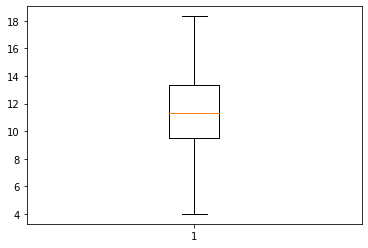

In [ ]:
plt.boxplot(df['GF']);

O diagrama gerado mostra que não existem outliers nas médias finais dos alunos e corrobora com o resumo estatístico dos dados no que diz respeito ao primeiro quartil, à mediana, ao terceiro quartil, ao menor valor das médias finais e o maior valor das médias finais.

A fim de computar em variáveis os valores de cada uma dessas medidas para que possam ser usadas futuramente, podemos criar variáveis para cada uma delas:

### Média das médias finais



In [ ]:
media_gf = np.mean(df['GF']);
media_gf

11.471204188481675

In [ ]:
mediana_gf = np.median(df['GF']);
print(mediana_gf);

11.333333333333334


### Primeiro quartil das médias finais

In [ ]:
q1_gf = df['GF'].quantile(0.25);
print(q1_gf);

9.5


### Terceiro quartil das médias finais

In [ ]:
q3_gf = df['GF'].quantile(0.75);
print(q3_gf);

13.333333333333334


### Menor média final

In [ ]:
menor_media_gf = np.min(df['GF']);
print(menor_media_gf);

4.0


### Maior média final

In [ ]:
maior_media_gf = np.max(df['GF']);
print(maior_media_gf);

18.333333333333332


## Histograma das médias finais, assimetria e curtose

A fim de analisarmos a distribuição de frequências das médias finais e suas características, plotamos o histograma para essa variável:

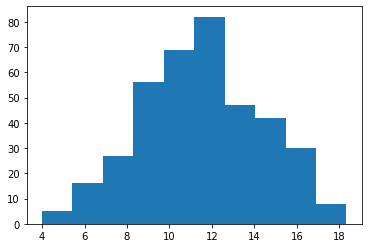

In [ ]:
plt.hist(df['GF']);

A partir do histograma podemos ver que uma grande parte dos alunos (mais de 80) obtiveram médias finais entre 10 e 12. <br>
O histograma também sugere que a distribuição é levemente assimétrica à direita, pois mais médias finais **estão concentrados nos menores valores**.

## Cáculo do Coeficiente de Assimetria de Bowley

Para constatar ou refutar a assimetria que inferimos do histograma, podemos aplicar a fórmula do Coeficiente de Assimetria de Bowley às médias finais.

A Assimetria de Bowley é dada por: <br>
## <center>$ A_{b} = \frac{q_{1} + q_{3} - 2*md}{q_{3} - q_{1}}  $</center>

Onde:
- $q_{1}$ é o primeiro quartil
- $q_{3}$ é o terceiro quartil
- $md$ é a mediana

E:
- Se $ A_{b} = 0 $, a distribuição é simétrica
- Se $ A_{b} < 0 $, a distribuição é assimétrica negativa (com assimetria à esquerda)
- Se $ A_{b} > 0 $, a distribuição é assimétrica positiva (com assimetria à direita) 

In [ ]:
assimetria_bowley = (q1_gf + q3_gf - 2*(mediana_gf))/(q3_gf - q1_gf)
print(assimetria_bowley)

0.04347826086956552


De fato, a distribuição apresenta uma assimetria à direita, pois o coeficiente de assimetria de Bowley resultou em 0.04347826086956552, um número positivo.

Também poderíamos inferir a assimetria pelos valores da média e da mediana das médias finais:

In [ ]:
print(media_gf)

11.471204188481675


In [ ]:
print(mediana_gf)

11.333333333333334


Como a média é maior que a mediana, naturalmente temos uma distribuição assimétrica à direita, com uma concentração nos menores valores.

Isso indica que a maioria dos alunos obteve uma nota baixo da média.

## Cálculo do Coeficiente Percentílico de Curtose

O Coeficiente Percentílico de Curtose é dado por: <br>
## <center> $C_{p} = \frac{\frac{q_{3} - q_{1}}{2}}{P_{90} - P_{10}}$ </center>

Onde: <br>
- $q_{1}$ é o primeiro quartil
- $q_{2}$ é o segundo quartil
- $P_{90}$ é o nonagésimo percentil
- $P_{10}$ é o décimo percentil

Para isso devemos calcular o décimo e o nonagésimo percentis:

E:
- Se $C_{p} \approx 0.263$, a curtose é mesocúrtica - razoavelmente concentrada em torno da moda
- Se $C_{p} < 0.263$, a curtose é leptocúrtica - fortemente concentrada em torno da moda
- Se $C_{p} > 0.263$, a curtose é platicúrtica - mais dispersa em torno da moda

### Nonagésimo percentil

In [ ]:
P90_gf = df['GF'].quantile(0.9)
print(P90_gf)

15.166666666666666


### Décimo percentil

In [ ]:
P10_gf = df['GF'].quantile(0.1)
print(P10_gf)

7.833333333333333


### Coeficiente Percentílico de Curtose

In [ ]:
coeficiente_perc = ((q3_gf - q1_gf)/2)/(P90_gf - P10_gf)
print(coeficiente_perc)

0.2613636363636364


Como o coeficiente percentílico de curtose resultou em 0.2613636363636364, sendo abaixo de 0.263, significa que **a distribuição é leptocúrtica**, com os valores fortemente concentrados em torno da moda.

Como a moda está abaixo da média, tal resultado corrobora com a informação que a maioria dos alunos obteve média final abaixo da média, segundo verificamos ao analisar a assimetria da distribuição.

# Parte 3 - Relação das variáveis com as notas e com a média final

## Análise das variáveis numéricas

### Matriz de Correlação

Para obtermos um overview das relações entre as variáveis **numéricas** entre si, podemos fazer uma análise bidimensional, considerando todas as variáveis numéricas de uma vez. Isso pode ser feito plotando a matriz de correlação das variáveis.

Inicialmente analisaremos as matrizes de correlação de cada matéria separadamente e então faremos a mesma análise para o dataframe que considera ambas as matérias em conjunto. Para todos esses casos utilizaremos o método de correlação de Pearson.

#### Matriz de Correlação para a matéria de Matemática

Utilizando o método corr da biblioteca Pandas, podemos gerar as matrizes de correlação para as vairáveis numéricas do dataframe:

In [ ]:
corr_mat = df_mat.corr(method = 'pearson')
corr_mat

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


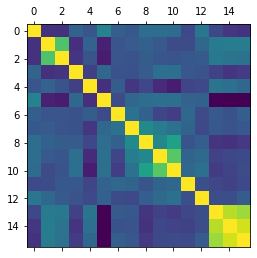

In [ ]:
plt.matshow(corr_mat)
plt.show()

A partir da matriz de correlação já podemos identificar as variáveis que mais têm relação positiva com as notas em Matemática:
- Medu - grau de escolaridade da mãe
- Fedu - grau de escolaridade do pai
- studytime - tempo que o aluno dedica ao estudo por semana

Também podemos identificar quais variáveis mais têm relação negativa com as notas de Matemática:
- age - idade
- traveltime - tempo que o aluno gasta para ir de casa à escola
- failures - reprovações
- goout - sair com os amigos

#### Matriz de Correlação para a matéria de Português

In [ ]:
corr_por = df_por.corr(method = 'pearson')
corr_por

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719


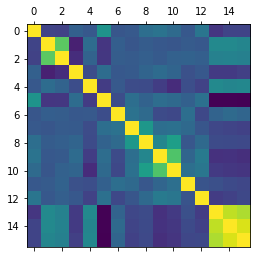

In [ ]:
plt.matshow(corr_por)
plt.show()

Para a disciplina de Português, as variáveis que mais apresentam uma relação positiva com as notas são:
- Medu - grau de escolaridade da mãe
- Fedu - grau de escolaridade do pai
- studytime - tempo que o aluno dedica ao estudo por semana
- famrel - qualidade das relações familiares

As variáveis que mais apresentam relação negativa com as notas são:
- failures - reprovações
- Dalc - consumo de ácool durante dias da semana
- Walc - consumo de álcool nos fins de semana

Podemos ver que as variáveis numéricas que mais influenciam positiviamente ou negativamente as notas dos alunos variam para cada uma das disciplinas, mas em ambas a educação dos pais e o tempo de estudo aparecem como um fator positivo e a reporvação como um fator negativo.

Desta forma, podemos esperar que tais fatores citados se motrem também determinantes no que diz respeito as à média final quando avaliarmos o dataframe que considera ambas as disciplinas juntas.

#### Matriz de correlação considerando amabas as disciplinas

In [ ]:
corr_df = df.corr(method = 'pearson')
corr_df

,age,Medu,Fedu,traveltime_mat,studytime_mat,failures_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat,traveltime_por,studytime_por,failures_por,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por,GF
age,1.000000,-0.120663,-0.127846,0.102608,-0.012225,0.153033,0.025451,0.004882,0.159631,0.128371,0.152132,-0.063236,0.125972,-0.117486,-0.175370,-0.194589,0.106545,-0.012686,0.258573,0.029286,0.016797,0.166931,0.131928,0.156795,-0.066906,0.086303,-0.109549,-0.042010,-0.067977,-0.151499
Medu,-0.120663,1.000000,0.649797,-0.205895,0.050040,-0.230169,0.011913,0.035366,0.066870,0.043789,-0.013696,-0.041731,0.108560,0.229202,0.217918,0.205489,-0.210965,0.048303,-0.204947,0.007279,0.014831,0.046280,0.038862,-0.016006,-0.033347,0.023040,0.205381,0.215948,0.203554,0.249790
Fedu,-0.127846,0.649797,1.000000,-0.187856,-0.003824,-0.245386,0.013003,-0.007420,0.033179,0.017978,0.000928,0.015450,0.033602,0.215871,0.180042,0.155444,-0.192147,-0.004195,-0.212409,0.009061,-0.026150,0.013843,0.013747,0.000440,0.023192,0.020829,0.157978,0.184825,0.172009,0.207486
traveltime_mat,0.102608,-0.205895,-0.187856,1.000000,-0.101530,0.113276,-0.019759,-0.025226,0.029932,0.157260,0.140232,0.006005,-0.010382,-0.104305,-0.160859,-0.126004,0.986531,-0.096579,0.074348,-0.009415,-0.015065,0.050244,0.163880,0.137999,0.004489,0.020235,-0.186061,-0.183894,-0.153973,-0.173847
studytime_mat,-0.012225,0.050040,-0.003824,-0.101530,1.000000,-0.198990,0.039674,-0.131549,-0.053359,-0.186142,-0.245865,-0.078714,-0.073315,0.153626,0.129343,0.091339,-0.096666,0.978000,-0.198541,0.026456,-0.144890,-0.067147,-0.186246,-0.241411,-0.078421,-0.151648,0.247059,0.265147,0.272130,0.208530
failures_mat,0.153033,-0.230169,-0.245386,0.113276,-0.198990,1.000000,-0.067605,0.092117,0.125573,0.127504,0.142781,0.081661,0.017246,-0.394911,-0.384942,-0.380741,0.121427,-0.205772,0.499888,-0.065743,0.096531,0.136226,0.126314,0.147968,0.084741,0.187251,-0.306097,-0.369433,-0.383864,-0.438094
famrel_mat,0.025451,0.011913,0.013003,-0.019759,0.039674,-0.067605,1.000000,0.161720,0.079477,-0.090306,-0.123335,0.096206,-0.056267,0.029599,-0.010866,0.068603,-0.023474,0.033354,-0.031898,0.970334,0.128066,0.036950,-0.096531,-0.122828,0.087705,-0.052550,-0.011597,0.021321,0.045309,0.031669
freetime_mat,0.004882,0.035366,-0.007420,-0.025226,-0.131549,0.092117,0.161720,1.000000,0.294310,0.199967,0.134965,0.069842,-0.048814,0.010145,-0.014223,0.017604,-0.033523,-0.142405,0.062015,0.139959,0.974424,0.281091,0.193291,0.139365,0.070069,0.028592,-0.090973,-0.113247,-0.108958,-0.045601
goout_mat,0.159631,0.066870,0.033179,0.029932,-0.053359,0.125573,0.079477,0.294310,1.000000,0.260664,0.417449,-0.027945,0.080057,-0.129491,-0.155863,-0.109654,0.032704,-0.062217,0.090001,0.049689,0.287391,0.936608,0.262964,0.400458,-0.044195,0.112995,-0.095997,-0.128927,-0.118224,-0.145303
Dalc_mat,0.128371,0.043789,0.017978,0.157260,-0.186142,0.127504,-0.090306,0.199967,0.260664,1.000000,0.647102,0.057706,0.148443,-0.080370,-0.050136,-0.044941,0.158594,-0.189511,0.175495,-0.089857,0.196331,0.265616,0.991651,0.649798,0.060654,0.146831,-0.233282,-0.256907,-0.264789,-0.158641


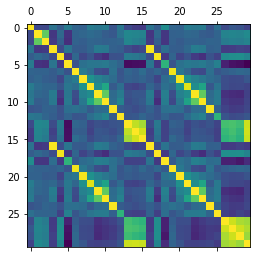

In [ ]:
plt.matshow(corr_df)
plt.show()

Como a visualização dos dados é mais difícil para esse caso dada a quantidade de variáveis, podemos filtrar os dados positivos e negativos a partir da coluna das médias finais do gráfico de correlação.

Para filtrar os resultados positivos, inseriremos em uma lista os valores nomes das variáveis que apresentaram valores postivos na matriz de correlão com a média final:

In [ ]:
# Criação de um array com o nome das colunas da matriz de correlação
colunas_matriz = np.array(corr_df.columns)
print(colunas_matriz)

['age' 'Medu' 'Fedu' 'traveltime_mat' 'studytime_mat' 'failures_mat'
 'famrel_mat' 'freetime_mat' 'goout_mat' 'Dalc_mat' 'Walc_mat'
 'health_mat' 'absences_mat' 'G1_mat' 'G2_mat' 'G3_mat' 'traveltime_por'
 'studytime_por' 'failures_por' 'famrel_por' 'freetime_por' 'goout_por'
 'Dalc_por' 'Walc_por' 'health_por' 'absences_por' 'G1_por' 'G2_por'
 'G3_por' 'GF']


In [ ]:
# Criação de um array com os coeficientes das variáveis associadas à media final
coeficientes_gf = np.array(corr_df['GF'])
print(coeficientes_gf)

[-0.15149881  0.24979015  0.20748617 -0.17384728  0.20852989 -0.43809433
  0.0316686  -0.04560068 -0.14530282 -0.15864055 -0.14199376 -0.13233069
 -0.05431021  0.88407015  0.89849024  0.87810448 -0.186138    0.2103016
 -0.25696919  0.01711264 -0.06646397 -0.15283129 -0.16069876 -0.14702524
 -0.13264665 -0.18837251  0.79250646  0.82989558  0.78560455  1.        ]


Cada coeficiente da matriz de coeficientes que se encontra no array de coeficientes está relacionado ao nome da sua variável no array de nomes das colunas pelo seu índice.

In [ ]:
lista_positivos = [] # Lista para armazenar os nomes das variáveis que têm relação positiva com a média final
for i in range(len(coeficientes_gf)):
  if coeficientes_gf[i] > 0:
    lista_positivos.append(colunas_matriz[i])
print(lista_positivos)

['Medu', 'Fedu', 'studytime_mat', 'famrel_mat', 'G1_mat', 'G2_mat', 'G3_mat', 'studytime_por', 'famrel_por', 'G1_por', 'G2_por', 'G3_por', 'GF']


Temos, assim, a lista das variáveis numéricas que se correlacionam positivamente com a média final. Vale observar que as variáveis *G1_mat*, *G2_mat*, *G3_mat*, *G1_por*, *G2_por*, *G3_por*, e *GF* devem ser desconsideradas dessa relação porque não são os fatores externos que influenciam a média final, pelo contrário - são influenciadas por eles. <br><br>
Também podemos reduzir *famrel_mat* e *famrel_por* a simplesmente uma variável **famrel**, pois ambas expressam a relação com os familiares e, de modo análogo, podemos reduzir *studytime_mat* e *studytime_por* a **studytime**.

Desta forma, temos que as variáveis numéricas que se relacionam positivamente com a média final são:
- Medu - grau de escolaridade da mãe
- Fedu - grau de escolaridade do pai
- studytime - tempo que se gasta estudando por semana
- famrel - qualidade do relacionamento com a família

Para as variáveis com influência negativa, estamos interessado em saber quais as que **mais** afetam a média final, pois já sabemos que elas são as que restam entre a diferença do conjunto original com as que influenciam positivamente:

In [ ]:
colun_gf_negativos = [] # Lista para armazenas os nomes das variáveis com relação negativa com a média final
coef_gf_negativos = [] # Lista para armazenas os coeficientes das variáveis com relação negativa com a média final
for i in range(len(coeficientes_gf)):
  if (coeficientes_gf[i] < 0): # Apenas as variáveis com reação e negativas serão adiconadas nas listas
    coef_gf_negativos.append(coeficientes_gf[i])
    colun_gf_negativos.append(colunas_matriz[i])

In [ ]:
coef_gf_negativos_ordem = [] # Lista para armazenas os nomes das variáveis com relação negativa com a média em ordem crescente
while (len(coef_gf_negativos) > 0):
  indice_menor = coef_gf_negativos.index(min(coef_gf_negativos)) # A cada iteração, o menor valor da lista de variáveis com influência negativa é colocado na lista defina acima
  coef_gf_negativos_ordem.append(colun_gf_negativos[indice_menor]) 
  coef_gf_negativos.pop(indice_menor) # Cada menor coeficiente colado na lista definida acima é então deletado da lista que está sendo analisada pelo while, a fim de se poder definir o próximo menor valor e impedir o loop infinito...
  colun_gf_negativos.pop(indice_menor) # ... e a mesma coisa é feita par os nomes das variáveis com maior influência negativa
coef_gf_negativos_ordem

['failures_mat',
 'failures_por',
 'absences_por',
 'traveltime_por',
 'traveltime_mat',
 'Dalc_por',
 'Dalc_mat',
 'goout_por',
 'age',
 'Walc_por',
 'goout_mat',
 'Walc_mat',
 'health_por',
 'health_mat',
 'freetime_por',
 'absences_mat',
 'freetime_mat']

Desta forma, as cinco variáveis que apresentam uma correlação mais negativa com a média final dos estudantes são:
- Reprovações em matemática
- Reprovações em português
- Faltas em português
- Tempo gasto para chegar à escola
- Consumo de álcool durante os dias da semana

#### Relação das reprovação com outras variáveis

Sabemos que a reprovação é a variável que mais apresenta relação com um baixo desempenho acadêmico. No entanto, podemos cogitar que existe uma relação entre a reprovação e as demais variáveis observadas. Isso é, cogitamos que algumas delas contribuem para a reprovação. Buscaremos analisar essa hipótese agora, baseando-nos nos coeficientes de corretaçãod e Spearman

In [ ]:
corr_df_spearman = df.corr(method = 'spearman')
corr_df_spearman

,age,Medu,Fedu,traveltime_mat,studytime_mat,failures_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat,traveltime_por,studytime_por,failures_por,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por,GF
age,1.000000,-0.122301,-0.120879,0.146950,0.020026,0.151373,0.017780,-0.005240,0.167079,0.100248,0.165281,-0.076469,0.107079,-0.111517,-0.198447,-0.205386,0.148734,0.018942,0.199206,0.015014,0.004659,0.173485,0.106582,0.172103,-0.079108,0.046941,-0.081356,-0.042127,0.008541,-0.135129
Medu,-0.122301,1.000000,0.656796,-0.187977,0.049423,-0.227837,0.014439,0.030895,0.067163,0.056956,-0.006711,-0.032516,0.101184,0.236395,0.241410,0.218206,-0.190245,0.048827,-0.194098,0.017947,0.013340,0.049541,0.049147,-0.011334,-0.024636,0.033019,0.224878,0.238810,0.237517,0.257051
Fedu,-0.120879,0.656796,1.000000,-0.184294,0.025085,-0.220273,0.017727,-0.011095,0.038543,0.029619,0.005498,0.021727,0.025788,0.223847,0.206560,0.174254,-0.186313,0.025242,-0.183487,0.021009,-0.028072,0.021343,0.022471,0.002083,0.029534,0.053357,0.178812,0.203840,0.181467,0.210775
traveltime_mat,0.146950,-0.187977,-0.184294,1.000000,-0.107360,0.097830,-0.041202,-0.031014,-0.002547,0.076953,0.065249,-0.020920,-0.014524,-0.096769,-0.137095,-0.134574,0.980313,-0.098803,0.131248,-0.030895,-0.016350,0.021749,0.092493,0.068323,-0.021098,0.063260,-0.153159,-0.153772,-0.148973,-0.153053
studytime_mat,0.020026,0.049423,0.025085,-0.107360,1.000000,-0.192054,0.058737,-0.123112,-0.051971,-0.205840,-0.255031,-0.095954,-0.051899,0.151941,0.119256,0.091638,-0.099794,0.971791,-0.197404,0.039959,-0.138970,-0.067979,-0.205245,-0.251090,-0.095371,-0.146989,0.252110,0.266116,0.274838,0.184601
failures_mat,0.151373,-0.227837,-0.220273,0.097830,-0.192054,1.000000,-0.082892,0.067936,0.106083,0.209141,0.146721,0.109214,0.016363,-0.416801,-0.400652,-0.398189,0.113264,-0.204408,0.535208,-0.086635,0.075984,0.126751,0.206464,0.158367,0.113046,0.199995,-0.364622,-0.408757,-0.417676,-0.467180
famrel_mat,0.017780,0.014439,0.017727,-0.041202,0.058737,-0.082892,1.000000,0.145015,0.072072,-0.127032,-0.129567,0.093856,-0.100544,0.029022,0.012219,0.064377,-0.031094,0.049151,-0.016637,0.964579,0.117123,0.034023,-0.128724,-0.129491,0.081701,-0.084696,-0.009928,0.030865,0.053629,0.037949
freetime_mat,-0.005240,0.030895,-0.011095,-0.031014,-0.123112,0.067936,0.145015,1.000000,0.295353,0.185840,0.120556,0.087604,0.002674,-0.007125,-0.026702,-0.008619,-0.032226,-0.137350,0.076779,0.126462,0.976690,0.279791,0.178044,0.124683,0.086292,0.007261,-0.103631,-0.123512,-0.109933,-0.056940
goout_mat,0.167079,0.067163,0.038543,-0.002547,-0.051971,0.106083,0.072072,0.295353,1.000000,0.245445,0.390246,-0.038883,0.175474,-0.130636,-0.151553,-0.147343,0.005865,-0.063802,0.082191,0.043988,0.284466,0.940793,0.251584,0.369915,-0.055442,0.107857,-0.083030,-0.138231,-0.113067,-0.140998
Dalc_mat,0.100248,0.056956,0.029619,0.076953,-0.205840,0.209141,-0.127032,0.185840,0.245445,1.000000,0.635087,0.071532,0.158026,-0.096140,-0.094667,-0.108114,0.085362,-0.210318,0.152930,-0.119018,0.183669,0.257424,0.975919,0.642566,0.074494,0.087909,-0.239920,-0.258532,-0.242679,-0.179448


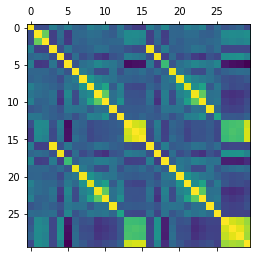

In [ ]:
plt.matshow(corr_df_spearman)
plt.show()

As reprovações só podem ser analisadas separadamente, para a matéria de Matetmática e de Português

In [ ]:
colunas_spearman = list(corr_df_spearman.columns)
print(colunas_spearman)

['age', 'Medu', 'Fedu', 'traveltime_mat', 'studytime_mat', 'failures_mat', 'famrel_mat', 'freetime_mat', 'goout_mat', 'Dalc_mat', 'Walc_mat', 'health_mat', 'absences_mat', 'G1_mat', 'G2_mat', 'G3_mat', 'traveltime_por', 'studytime_por', 'failures_por', 'famrel_por', 'freetime_por', 'goout_por', 'Dalc_por', 'Walc_por', 'health_por', 'absences_por', 'G1_por', 'G2_por', 'G3_por', 'GF']


In [ ]:
failures_mat = list(corr_df_spearman['failures_mat'])
print(failures_mat)

[0.15137321209946103, -0.22783662640763064, -0.22027267327504144, 0.09782969828842676, -0.1920542836558662, 1.0, -0.08289239042431366, 0.06793568744308139, 0.10608329392113951, 0.20914132222375661, 0.14672129600028366, 0.10921361559080241, 0.01636343221080493, -0.41680079963619726, -0.4006520520055403, -0.3981885490669266, 0.11326398120006899, -0.20440807199662112, 0.5352079040991536, -0.08663481850421753, 0.07598447857936652, 0.1267511120132482, 0.20646374775955134, 0.15836679240070473, 0.11304608046368612, 0.199994682562241, -0.3646222126284543, -0.4087573155808748, -0.4176763686279288, -0.4671798085078649]


Analisando as 15 maiores causas de reprovações em Matemática, temos:

In [ ]:
causas_rep_mat = []
for i in range(15):
  indice_menor = failures_mat.index(max(failures_mat))
  causas_rep_mat.append(colunas_spearman[indice_menor])
  failures_mat.pop(indice_menor)
  colunas_spearman.pop(indice_menor)
print(causas_rep_mat)

['failures_mat', 'failures_por', 'Dalc_mat', 'Dalc_por', 'absences_por', 'Walc_por', 'age', 'Walc_mat', 'goout_por', 'traveltime_por', 'health_por', 'health_mat', 'goout_mat', 'traveltime_mat', 'freetime_por']


Para os resultados que obtivemos, podemos ignorar aqueles que dizem respeito à disciplina de Português, uma vez que estamos analisando a de Matemática

Os principais fatores relacionados à reprovação em Matemática são:
- Dalc_mat - ingestão de álcool durante os dias da semana
- age - idade
- Walc_mat - ingestão de álcool nos fins de semana
- health_mat - a saúde
- goout_mat - sair com os amigos
- traveltime_mat - tempo para chegar à escola

Podemos ver que algumas variáveis que estão relacionadas com a reprovação são aquelas que dizem respeito a perfis mais focados em diversão - ingestão de álcool e sair com os amigos
Outras, como morar longe, dizem respeito a dificuldades causadas por fatores geográficos e também a saúde

Fatores tanto como a ingestão de álcool e morar longe da escola, portanto, figuram entre as principais variáveis de reprovação e estas mesmas aparecem como fatores que se relationam negativamente com a média final dos alunos

A idade, de fato, tem uma relação muito forte com a reprovação, uma vez que, quando reprova, o aluno deve repetir o ano e isso faz com que ele saia mais tarde da escola, permanecendo nela enquanto está em uma idade mais avançada que seus colegas que não reprovaram 

Analisamos abaixo as principais variáveis relacionadas com as reprovações em Português



In [ ]:
colunas_spearman = list(corr_df_spearman.columns)
print(colunas_spearman)

['age', 'Medu', 'Fedu', 'traveltime_mat', 'studytime_mat', 'failures_mat', 'famrel_mat', 'freetime_mat', 'goout_mat', 'Dalc_mat', 'Walc_mat', 'health_mat', 'absences_mat', 'G1_mat', 'G2_mat', 'G3_mat', 'traveltime_por', 'studytime_por', 'failures_por', 'famrel_por', 'freetime_por', 'goout_por', 'Dalc_por', 'Walc_por', 'health_por', 'absences_por', 'G1_por', 'G2_por', 'G3_por', 'GF']


In [ ]:
failures_por = list(corr_df_spearman['failures_por'])
print(failures_por)

[0.19920594534264882, -0.19409787236982257, -0.183486870715849, 0.13124763374305112, -0.19740446855545005, 0.5352079040991536, -0.0166370277436146, 0.07677920816254533, 0.0821908617464604, 0.15293037823464534, 0.14888544628859776, 0.0968892328852921, 0.015237071015186093, -0.18709209045904962, -0.18192134171111723, -0.169605369598385, 0.1554583545840158, -0.19952010047408483, 1.0, -0.024977951136225054, 0.10748434325192532, 0.0737938374475905, 0.1694647219838279, 0.14596119322603457, 0.08025452394659323, 0.08341853434104088, -0.3359452133588963, -0.3371502963440155, -0.3415314059594184, -0.27631791083929863]


In [ ]:
causas_rep_por = []
for i in range(15):
  indice_menor = failures_por.index(max(failures_por))
  causas_rep_por.append(colunas_spearman[indice_menor])
  failures_por.pop(indice_menor)
  colunas_spearman.pop(indice_menor)
print(causas_rep_por)

['failures_por', 'failures_mat', 'age', 'Dalc_por', 'traveltime_por', 'Dalc_mat', 'Walc_mat', 'Walc_por', 'traveltime_mat', 'freetime_por', 'health_mat', 'absences_por', 'goout_mat', 'health_por', 'freetime_mat']


As principais variáveis que estão relacionadas com as reprovações em Português, portanto, são:
- age - idade
- Dalc - consumo de álcool durante os dias da semana
- traveltime_por - tempo para chegar à escola
- Walc_por - consumo de álcool durante os finais de semana
- freetime_por - tempo livre após as aulas
- absences_por - faltas
- health_por - saúde

Embora inlcua as típicas variáveis do consumo de álcool, idade e tempo para chegar à escola, em Português o tempo livre aparece relacionado às reprovações, assim como as faltas. <br><br>
O fato do tempo livre se relacionar positivamente com as reprovações e o fato das faltas também o fazer, indica um certo desinteresse por parte daqueles que reprovam

## Análise das variáveis qualitativas

Para analisar as variáveis do tipo qualitativa vamos usar a estratégia de separar os dados em dois grupos - dos alunos que obtiveram média final maior ou igual à média e aquele dos alunos que obtiveram nota abaixo da média e para cada um desses grupos analisaremos a frequência da ocorrência de determinada variável qualitativa

In [ ]:
# Dataframe com os dados dos alunos com nota abaixo da média
df_abaixo_media = df[df['GF'] < media_gf]
df_abaixo_media

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_mat,traveltime_mat,studytime_mat,failures_mat,schoolsup_x,famsup_mat,paid_mat,activities_mat,nursery,higher_mat,internet,romantic_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat,guardian_por,traveltime_por,studytime_por,failures_por,schoolsup_y,famsup_por,paid_por,activities_por,higher_por,romantic_por,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por,GF
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,mother,2,2,0,yes,no,no,no,yes,no,4,3,4,1,1,3,4,0,11,11,6.500000
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,father,1,2,0,no,yes,no,no,yes,no,5,3,3,1,1,3,2,9,11,11,7.833333
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,mother,1,2,0,yes,no,no,no,yes,no,4,3,2,2,3,3,6,12,13,12,10.333333
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,father,1,2,0,no,yes,no,no,yes,no,4,3,2,1,2,5,0,11,13,13,10.500000
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6,mother,2,2,0,yes,yes,no,no,yes,no,4,1,4,1,1,1,2,10,13,13,8.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,MS,F,18,R,GT3,T,4,4,teacher,at_home,reputation,mother,3,1,0,no,yes,yes,yes,yes,yes,yes,yes,4,4,3,2,2,5,7,6,5,6,mother,3,1,0,no,yes,no,yes,yes,yes,4,4,3,2,2,5,4,7,9,10,7.166667
376,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,0,7,5,0,mother,1,3,1,no,no,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10,7.166667
378,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0,mother,3,2,2,no,no,no,yes,yes,yes,3,4,4,2,2,5,3,7,8,7,5.500000
379,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0,mother,2,2,0,no,no,no,yes,yes,no,1,1,1,1,1,5,6,11,12,9,7.166667


Temos que dos 382 alunos, 198 obtiveram média final abaixo da média. Assim:

In [ ]:
df_abaixo_media.shape[0]/df.shape[0]

0.518324607329843

52% dos alunos obtiveram média final abaixo da média

In [ ]:
# Dataframe dos alunos que obtiveram média final menor ou abaixo da média
df_media_acima = df[df['GF'] >= media_gf]
df_media_acima

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_mat,traveltime_mat,studytime_mat,failures_mat,schoolsup_x,famsup_mat,paid_mat,activities_mat,nursery,higher_mat,internet,romantic_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat,guardian_por,traveltime_por,studytime_por,failures_por,schoolsup_y,famsup_por,paid_por,activities_por,higher_por,romantic_por,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por,GF
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,mother,1,3,0,no,yes,no,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,14.333333
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15,mother,1,2,0,no,yes,no,yes,yes,no,5,4,2,1,2,5,6,12,12,13,13.666667
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11,mother,1,2,0,no,no,no,no,yes,no,4,4,4,1,1,3,0,13,12,13,12.166667
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19,mother,1,2,0,no,yes,no,no,yes,no,4,2,2,1,1,1,0,15,16,17,16.833333
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15,mother,1,2,0,no,yes,no,yes,yes,no,5,5,1,1,1,5,0,12,12,13,13.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,MS,M,18,U,GT3,T,4,4,teacher,teacher,home,father,1,2,0,no,no,yes,yes,no,yes,yes,no,3,2,4,1,4,2,4,15,14,14,father,1,2,0,no,no,no,yes,yes,no,3,2,4,1,4,2,4,17,18,19,16.166667
371,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4,4,3,1,1,3,2,11,11,10,father,2,2,0,no,no,no,yes,yes,no,4,4,3,1,1,3,4,14,15,16,12.833333
374,MS,F,18,R,GT3,T,2,2,at_home,other,other,mother,2,3,0,no,no,yes,no,yes,yes,no,no,5,3,3,1,3,4,2,10,9,10,mother,2,3,0,no,no,no,no,yes,no,5,3,3,1,3,4,0,14,17,15,12.500000
377,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,3,4,1,1,1,0,7,9,8,mother,1,2,0,no,yes,no,no,yes,no,4,3,4,1,1,1,4,15,15,16,11.666667


### Internet em casa

Pode-se esperar que os alunos com acesso à internet em casa consigam obter notas melhores por disporem de mais recursos para estudar. Agora avaliaremos se existe uma relação entre a disponibilidade da internet e as médias finais dos alunos

Dos alunos com médias finais acima ou iguais à média, quantos  deles possuem acesso à internet? 

In [ ]:
acesso_internet_media_acima = df_media_acima[df_media_acima['internet'] == 'yes']
acesso_internet_media_acima = acesso_internet_media_acima.shape[0]
print(acesso_internet_media_acima)

161


Que porcentagem isso representa dentre os alunos que estão acima ou igual à media?

In [ ]:
porcentagem = acesso_internet_media_acima/df_media_acima.shape[0]
print(str(round(porcentagem * 100, 2)) + '%')

87.5%


Dos alunos que obtiveram média final abaixo da média, quantos deles possuem acesso à internet?

In [ ]:
acesso_internet_abaixo = df_abaixo_media[df_abaixo_media['internet'] == 'yes']
acesso_internet_abaixo = acesso_internet_abaixo.shape[0]
print(acesso_internet_abaixo)

163


Que porcentagem isso representa dentre os alunos que estão abaixo da média?

In [ ]:
porcentagem = acesso_internet_abaixo/df_abaixo_media.shape[0]
print(str(round(porcentagem * 100, 2)) + '%')

82.32%


87.5% dos alunos que obtiveram média final acima ou igual à media possuem acesso à internet, e 82.32% dos alunos que ficaram abaixo da média possuem internet em casa

Isso nos leva a concluir que o acesso à internet por si só não é algo que influencia na nota final do aluno, uma vez que quase a mesma porcentagem dos alunos de alunos, tanto que os acima ou igual à media, quanto os abaixo da média, possuem acesso à internet em casa. Fatores como a diposição do aluno usar a internet para estudar devem ser mais determinantes para se obter uma média final melhor do que o fato de ter internet em casa por si só

Com o pressuposto que ter acesso a internet em casa por si só não é um fator que colabora para que o aluno obtenha um bom desempenho na escola, esperamos verficar que uma boa parte de mesmo aqueles alunos que ficaram com média igual ou abaixo do primeiro quartil possui acesso à internet em casa

In [ ]:
# Dataframe com os alunos abaixo do primeiro quartil
df_q1 = df[df['GF'] <= q1_gf]

In [ ]:
# Quantidade de alunos com média final menor ou igual ao primeiro quartil que possuen internet em casa
acesso_internet_q1 = df_q1[df_q1['internet'] == 'yes']
acesso_internet_q1 = acesso_internet_q1.shape[0]
print(acesso_internet_q1)

80


In [ ]:
# Função para calcular a porcentagem de ocorrências em um dataframe
def porcentagem(df_parte, df_todo):
  porcentagem = df_parte/df_todo.shape[0]
  print(str(round(porcentagem * 100, 2)) + '%')

In [ ]:
# Porcentagem dos alunos com média final abaixo ou igual ao primeiro quartil que possuem internet em casa
porcentagem(acesso_internet_q1, df_q1)

81.63%


De fato, 81.63% dos alunos que não obtiveram um desempenho que supere o primeiro quartil pussim internet em casa. E esse cenário já era de se esperar em um país como Portugal, na Europa, uma região bem globalizada. Muitos alunos possuem internet em casas, mas nem todos a usam como um meio de obter um bom desempenho na escola

### Emprego dos pais

Como a escolaridade dos pais mostrou ter uma grande relação com a média final dos alunos, e sabe-se que existe uma relação entre o grau de escolaridade de uma pessoa e o seu emprego, buscaremos saber se algum dos empregos exercidos pelos pais, que constam nos datasets, apresentam a mesma influência positiva sobre a nota dos filhos.

In [ ]:
# Conjunto de com todos os empregos presentes no dataset:
set(df['Mjob'])

{'at_home', 'health', 'other', 'services', 'teacher'}

Naturalmente se espera que filhos de professores apresentem um bom desempenho nas atividades escolares. Analisaremos essa hipótese agora

Primeiramente criaremos um dataset dos alunos que são filhos de um pai professor

In [ ]:
df_filhos_professor = df[df['Fjob'] == 'teacher']
df_filhos_professor.shape[0]

31

Analisando a porcentagem dos filhos de professoras que obtiveram média final igual ou acima da média:

In [ ]:
df_media_acima = df_filhos_professor[df_filhos_professor['GF'] >= media_gf]
df_media_acima = df_media_acima.shape[0]
print(df_media_acima)

20


Esse número corresponde a:

In [ ]:
porcentagem(df_media_acima, df_filhos_professor)

64.52%


Aplicando a mesma análise para filhos de professoras:

In [ ]:
df_filhos_professora = df[df['Mjob'] == 'teacher']
df_filhos_professora.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_mat,traveltime_mat,studytime_mat,failures_mat,schoolsup_x,famsup_mat,paid_mat,activities_mat,nursery,higher_mat,internet,romantic_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat,guardian_por,traveltime_por,studytime_por,failures_por,schoolsup_y,famsup_por,paid_por,activities_por,higher_por,romantic_por,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por,GF
10,GP,F,15,U,GT3,T,4,4,teacher,health,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,3,3,3,1,2,2,0,10,8,9,mother,1,2,0,no,yes,no,no,yes,no,3,3,3,1,2,2,2,14,14,14,11.500000
13,GP,M,15,U,GT3,T,4,3,teacher,other,course,mother,2,2,0,no,yes,yes,no,yes,yes,yes,no,5,4,3,1,2,3,2,10,10,11,mother,2,2,0,no,yes,no,no,yes,no,5,4,3,1,2,3,0,12,12,13,11.333333
20,GP,M,15,U,GT3,T,4,3,teacher,other,reputation,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,1,1,1,1,0,13,14,15,mother,1,2,0,no,no,no,no,yes,no,4,4,1,1,1,1,0,12,13,14,13.500000
22,GP,M,16,U,LE3,T,4,2,teacher,other,course,mother,1,2,0,no,no,no,yes,yes,yes,yes,no,4,5,1,1,3,5,2,15,15,16,mother,1,2,0,no,no,no,yes,yes,no,4,5,1,1,3,5,0,12,13,14,14.166667
29,GP,M,16,U,GT3,T,4,4,teacher,teacher,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,yes,4,4,5,5,5,5,16,10,12,11,mother,1,2,0,no,yes,yes,yes,yes,yes,4,4,5,5,5,5,4,12,11,12,11.333333


In [ ]:
df_media_acima = df_filhos_professora[df_filhos_professora['GF'] >= media_gf]
df_media_acima = df_media_acima.shape[0]
print(df_media_acima)

32


In [ ]:
porcentagem(df_media_acima, df_filhos_professora)

51.61%


Para ambos os pais professores:

In [ ]:
df_filhos_professores = df[(df['Mjob'] == 'teacher') & (df['Fjob'] == 'teacher')]
df_filhos_professores.shape[0]

14

In [ ]:
df_media_acima = df_filhos_professores[df_filhos_professores['GF'] >= media_gf]
df_media_acima = df_media_acima.shape[0]
print(df_media_acima)

9


In [ ]:
porcentagem(df_media_acima, df_filhos_professores)

64.29%


64.52% dos filhos de pais professores obtiveram desempenho igual ou acima da médoa, ao passo que 51.61% dos filhos de professoras obtiveram um desempenho igual ou acima da média. 64.29% dos filhos dos quais ambos os pais são professores obtiveram desempenho igual ou acima da média.<br>
São números razoáveis, principalmente no que diz respeito a alunos filhos de pai professor. <br>
A respeito da mãe professora, naturalmente se esperava que essa porcentagem fosse maior, mas a definição se são bons números ou não fica mais clara quando se comparam com pais que desempenham outras profissões

Para filhos de pai que trabalha na área da saúde:

In [ ]:
df_pai_saude = df[df['Fjob'] == 'health']
df_pai_saude.shape[0]

17

In [ ]:
df_media_acima = df_pai_saude[df_pai_saude['GF'] >= media_gf]
df_media_acima = df_media_acima.shape[0]
print(df_media_acima)

10


In [ ]:
porcentagem(df_media_acima, df_pai_saude)

58.82%


Para filhos de mãe que trabalha na área da saúde:

In [ ]:
df_mae_saude = df[df['Mjob'] == 'health']
df_mae_saude.shape[0]

33

In [ ]:
df_media_acima = df_mae_saude[df_mae_saude['GF'] >= media_gf]
df_media_acima = df_media_acima.shape[0]
print(df_media_acima)

21


In [ ]:
porcentagem(df_media_acima, df_mae_saude)

63.64%


Filhos de ambos pais e mãe que trabalham na área de saúde:

In [ ]:
df_filhos_saude = df[(df['Mjob'] == 'health') & (df['Fjob'] == 'health')]
df_filhos_saude.shape[0]

6

In [ ]:
df_media_acima = df_filhos_saude[df_filhos_saude['GF'] >= media_gf]
df_media_acima = df_media_acima.shape[0]
print(df_media_acima)

4


In [ ]:
porcentagem(df_media_acima, df_filhos_saude)

66.67%


Filho de pai que trabalha na área de serviços:

In [ ]:
df_pai_servicos = df[df['Fjob'] == 'services']
df_pai_servicos.shape[0]

107

In [ ]:
df_media_acima = df_pai_servicos[df_pai_servicos['GF'] >= media_gf]
df_media_acima = df_media_acima.shape[0]
print(df_media_acima)

51


In [ ]:
porcentagem(df_media_acima, df_pai_servicos)

47.66%


Filho de mãe que trabalha na área de serviços:

In [ ]:
def emprego_media(df, label_coluna, emprego):
  df_parte = df[df[label_coluna] == emprego]
  df_parte.shape[0]
  df_media_acima = df_parte[df_parte['GF'] >= media_gf]
  df_media_acima = df_media_acima.shape[0]
  porcentagem(df_media_acima, df_parte)

In [ ]:
emprego_media(df, 'Mjob', 'services')

55.21%


Filho de ambos os pais que trabalham na área de serviços:

In [ ]:
df_filhos_servico = df[(df['Mjob'] == 'services') & (df['Fjob'] == 'services')]
df_filhos_servico.shape[0]

39

In [ ]:
df_media_acima = df_filhos_servico[df_filhos_servico['GF'] >= media_gf]
df_media_acima = df_media_acima.shape[0]
print(df_media_acima)

20


In [ ]:
porcentagem(df_media_acima, df_filhos_servico)

51.28%


Filho de pai que trabalha em casa:

In [ ]:
emprego_media(df, 'Fjob', 'at_home')

50.0%


Filho de mãe que trabalha em casa:

In [ ]:
emprego_media(df, 'Mjob', 'at_home')

30.19%


Filho de ambos os pais trabalham em casa

In [ ]:
df_filhos_casa = df[(df['Mjob'] == 'at_home') & (df['Fjob'] == 'at_home')]
df_filhos_casa.shape[0]

7

In [ ]:
df_media_acima = df_filhos_casa[df_filhos_casa['GF'] >= media_gf]
df_media_acima = df_media_acima.shape[0]
print(df_media_acima)

5


In [ ]:
porcentagem(df_media_acima, df_filhos_casa)

71.43%


Filho cujo pai trablaha em outro empregk

In [ ]:
emprego_media(df, 'Fjob', 'other')

45.02%


Filho cuja mãe trabaha em outro emprego

In [ ]:
emprego_media(df, 'Mjob', 'other')

44.93%


Filho cujo ambos os pais trabalah em outro emprego

In [ ]:
df_filhos_outro = df[(df['Mjob'] == 'other') & (df['Fjob'] == 'other')]
df_filhos_outro.shape[0]

103

In [ ]:
porcentagem(df_media_acima, df_filhos_outro)

4.85%


Desta forma, pdemos ver que proporcionalmente filhos de profissionais da área da saúde e de professores apresentaram melhor desempenho nas médias finais. Sendo essas duas áreas as mais bem instruídas das avaliadas, mais uma vez podemos ver que o grau de escolaridade dos pais é um fator relacionado posivitamente com as médias finais dos filhos.



Considerando isso e também os fatores negativos relacionados às notas dos alunos abaixo da média, temos que o grau de instrução dos pais e a disposição dos alunos em estudar e obter boas notas (em detrimento de lazeres prejudiciais à sua vida escolar) são os fatores que mais apresentam relação significativa com a variável resposta. Além disso, a distância da casa do aluno para a escola também apresentou uma relação inversamente proporcional ao desempenho do aluno, apresentando uma relação negativa com a média final.

Visto que os problemas relacionados ao baixo desempenho do aluno têm um background de cunho social, uma alternativa interessante para melhorar o processo de ensino seria promover atividades que viessem a inserir os pais e os alunos cadavez mais na comunidade esoclar, tornando-os sujeitos ativos dentro dela, a fim de que venham a entender cada vez mais o papel da educação e sua contribuição para a sociedade. A ideia é fazer com que cada vez mais os pais e os alunos participem de forma voluntária nos processos de aprendizagem e se desenvolvam.